In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [3]:
df = pd.read_csv('F-11 and injet.csv',index_col=0,parse_dates=True)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000203569E8EC8>,
      dtype=object)

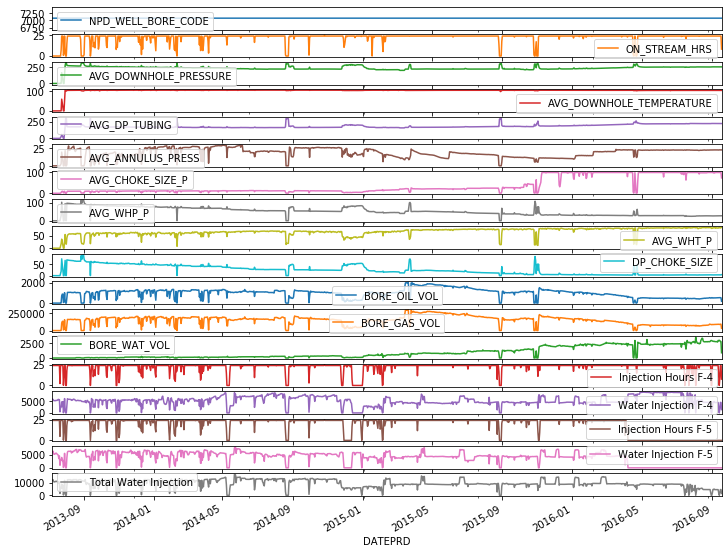

In [6]:
df.plot(figsize = (12,10),subplots = True)

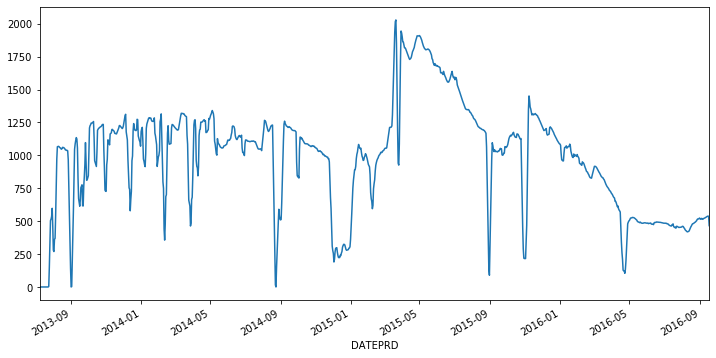

In [10]:
df['BORE_OIL_VOL'].rolling('5D').mean().plot(figsize=(12,6))

In [11]:
df  =df.rolling('5D').mean() 

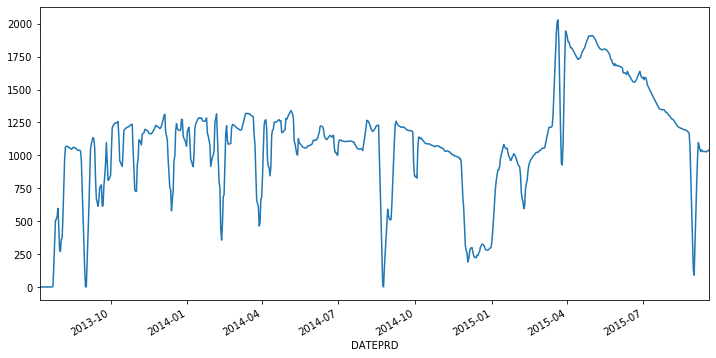

In [22]:
df.iloc[:800]['BORE_OIL_VOL'].plot(figsize=(12,6))

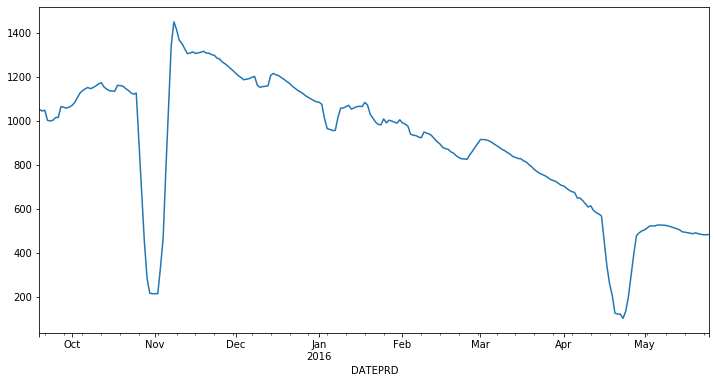

In [23]:
df.iloc[800:1050]['BORE_OIL_VOL'].plot(figsize=(12,6))

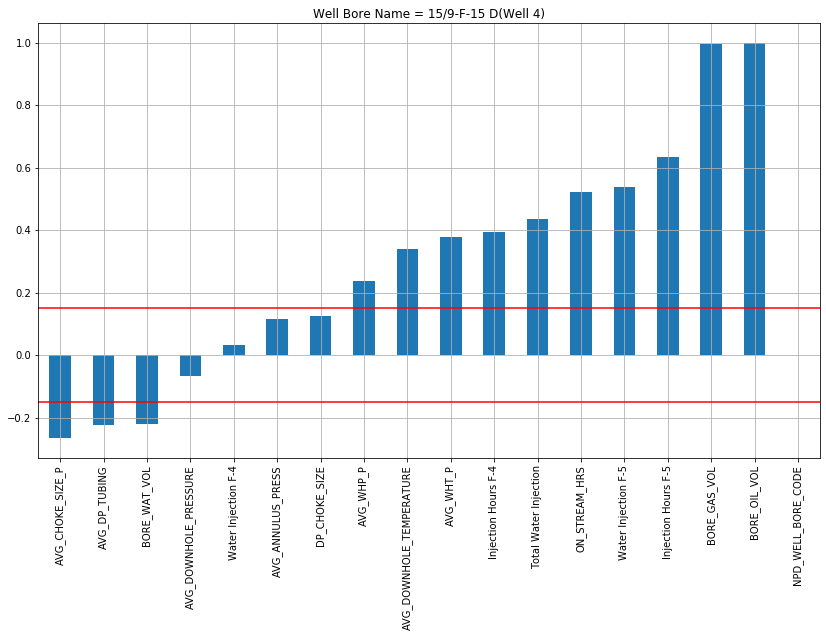

In [24]:
plt.figure(figsize=(14,8))
df.corr()['BORE_OIL_VOL'].sort_values().plot(kind = 'bar')
plt.axhline(y = 0.15,color = 'red')
plt.axhline(y = -0.15,color = 'red')
plt.title('Well Bore Name = 15/9-F-15 D(Well 4)')
plt.grid(True)

In [25]:
df.columns

Index(['NPD_WELL_BORE_CODE', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS',
       'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE',
       'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL', 'Injection Hours F-4',
       'Water Injection F-4', 'Injection Hours F-5', 'Water Injection F-5',
       'Total Water Injection'],
      dtype='object')

In [30]:
to_drop =["BORE_GAS_VOL",'AVG_DOWNHOLE_TEMPERATURE','AVG_DOWNHOLE_PRESSURE','AVG_DOWNHOLE_TEMPERATURE',
          'NPD_WELL_BORE_CODE','BORE_OIL_VOL','BORE_WAT_VOL','Injection Hours F-4',
          'Water Injection F-4', 'Injection Hours F-5', 'Water Injection F-5',
          'Total Water Injection']

In [31]:
X = df.drop(to_drop,axis = 1)
Y = df['BORE_OIL_VOL']

In [32]:
X.columns

Index(['ON_STREAM_HRS', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS',
       'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE'],
      dtype='object')

In [33]:
X_train = X.iloc[0:800,:]
X_test = X.iloc[800:1050,:]
y_train = Y.iloc[0:800]
y_test = Y.iloc[800:1050]

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [39]:
rf = RandomForestRegressor(n_estimators=100)
gb = GradientBoostingRegressor(n_estimators=150)

In [40]:
rf.fit(X_train,y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [41]:
gb.fit(X_train,y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [42]:
rf.score(X_test,y_test)

-0.25907414544197915

In [43]:
gb.score(X_test,y_test)

-0.41041968858471783

In [44]:
y_predict_RF = rf.predict(X_test)
y_predict_GB = gb.predict(X_test)

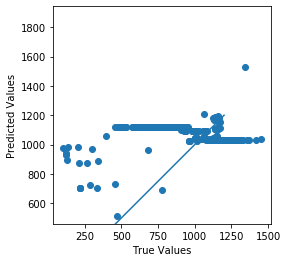

In [45]:
plt.scatter(y_test, y_predict_RF)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.axis('equal')
plt.axis('square')
_ = plt.plot([-400,1200],[-400,1200])

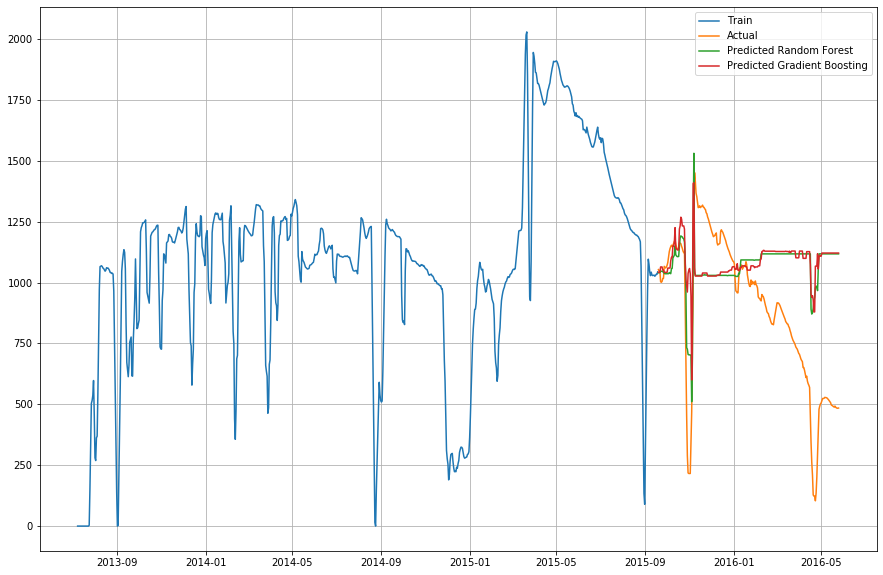

In [46]:
plt.figure(figsize=(15,10))
plt.plot(X_train.index,y_train,label = 'Train')
plt.plot(X_test.index,y_test,label= 'Actual')
plt.plot(X_test.index,y_predict_RF,label = 'Predicted Random Forest')
plt.plot(X_test.index,y_predict_GB,label = 'Predicted Gradient Boosting')
plt.grid()
plt.legend()

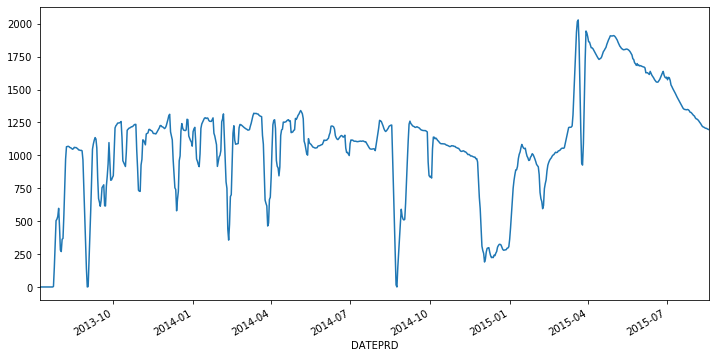

In [54]:
df.iloc[:770]['BORE_OIL_VOL'].plot(figsize=(12,6))

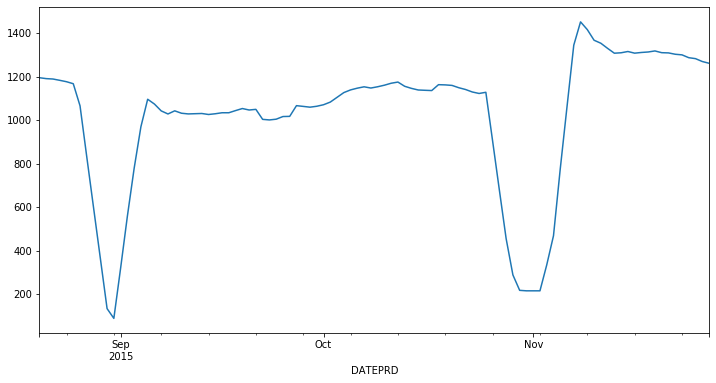

In [55]:
df.iloc[770:870]['BORE_OIL_VOL'].plot(figsize=(12,6))

In [129]:
X_train = X.iloc[0:820,:]
X_test = X.iloc[750:870,:]
y_train = Y.iloc[0:820]
y_test = Y.iloc[750:870]

In [130]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [131]:
rf = RandomForestRegressor(n_estimators=100)
gb = GradientBoostingRegressor(n_estimators=150)

In [132]:
rf.fit(X_train,y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [133]:
gb.fit(X_train,y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [134]:
rf.score(X_test,y_test)

0.7547306939830697

In [135]:
gb.score(X_test,y_test)

0.4155604151729674

In [136]:
y_predict_RF = rf.predict(X_test)
y_predict_GB = gb.predict(X_test)

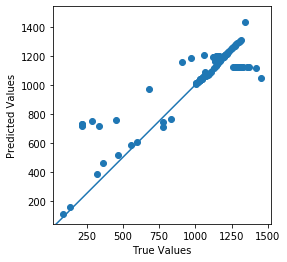

In [137]:
plt.scatter(y_test, y_predict_RF)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.axis('equal')
plt.axis('square')
_ = plt.plot([-400,1200],[-400,1200])

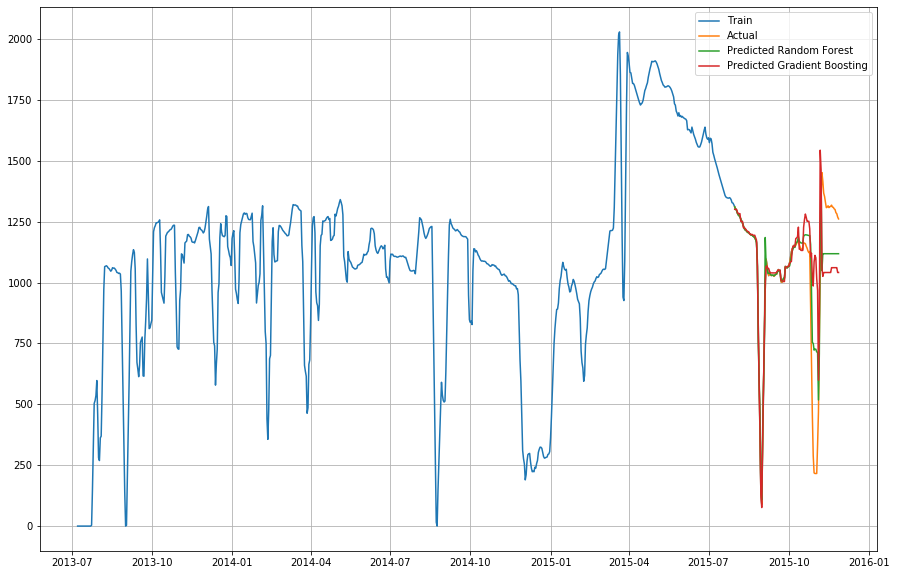

In [138]:
plt.figure(figsize=(15,10))
plt.plot(X_train.index,y_train,label = 'Train')
plt.plot(X_test.index,y_test,label= 'Actual')
plt.plot(X_test.index,y_predict_RF,label = 'Predicted Random Forest')
plt.plot(X_test.index,y_predict_GB,label = 'Predicted Gradient Boosting')
plt.grid()
plt.legend()

### Neural 

In [139]:
import tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [69]:
to_drop =['NPD_WELL_BORE_CODE',"BORE_GAS_VOL",'AVG_DOWNHOLE_TEMPERATURE','BORE_WAT_VOL','Injection Hours F-4',
          'Water Injection F-4', 'Injection Hours F-5', 'Water Injection F-5',
          'Total Water Injection']
df1cnn= df.drop(to_drop,axis = 1)
df1cnn.head()


,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL
DATEPRD,,,,,,,,,
2013-07-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-07-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-07-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-07-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-07-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
df_train = df1cnn.iloc[:870, :]
df_test = df1cnn.iloc[700:870 , :]

In [93]:
df_train.shape , df_test.shape

((870, 9), (170, 9))

In [94]:
train_labels = df_train.pop('BORE_OIL_VOL')
test_labels = df_test.pop('BORE_OIL_VOL')

In [95]:
train_stats = df_train.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
ON_STREAM_HRS,870.0,21.891069,5.013681,0.0,22.966000,24.000000,24.000000,24.2000
AVG_DOWNHOLE_PRESSURE,870.0,229.181064,41.776473,0.0,219.951050,222.660200,248.983450,311.7312
AVG_DP_TUBING,870.0,170.907094,31.187540,0.0,166.738400,170.862700,177.882050,300.1828
AVG_ANNULUS_PRESS,870.0,18.035728,6.584072,0.0,13.251500,17.715700,23.904425,29.1778
AVG_CHOKE_SIZE_P,870.0,15.697235,14.165730,0.0,10.122643,11.770959,20.706326,100.0000
AVG_WHP_P,870.0,58.364061,18.955942,0.0,46.214050,55.322600,74.371600,110.2530
AVG_WHT_P,870.0,63.347324,14.601635,0.0,59.911687,66.292200,74.367500,80.8092
DP_CHOKE_SIZE,870.0,31.057982,16.934761,0.0,18.356950,26.720600,46.128750,85.1322


In [96]:
def norm(x):
  return (x-train_stats['mean'])/train_stats['std']
normed_train_data = norm(df_train)
normed_test_data = norm(df_test)

In [97]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64,activation = tf.nn.relu,input_shape=[len(df_train.keys())]),
        layers.Dense(64,activation = tf.nn.relu),
        layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss = 'mse',optimizer = optimizer,metrics=['mae','mse'])
    return model

In [98]:
model = build_model()

In [99]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [100]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    if epoch % 100 ==0: print("")
    print('.',end = '')
EPOCHS = 1000
history = model.fit(
    normed_train_data, train_labels,
    epochs = EPOCHS, validation_split = 0.2, verbose = 0,
    callbacks = [PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [101]:
hist = pd.DataFrame(history.history)
hist['epoch']= history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,1283.060849,26.143759,1283.060913,8.214470e+06,1503.767456,8214470.0,995
996,1265.528605,25.951351,1265.528687,8.250407e+06,1511.958740,8250406.5,996
997,1275.533593,26.104588,1275.533691,8.340952e+06,1525.014771,8340952.5,997
998,1291.746814,26.086567,1291.746826,8.229264e+06,1507.065186,8229264.0,998
999,1244.686309,25.843010,1244.686279,8.315120e+06,1520.574341,8315120.5,999


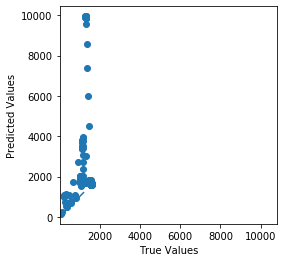

In [102]:
test_predictions = model.predict(normed_test_data).flatten()
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.axis('equal')
plt.axis('square')
_ = plt.plot([-400,1200],[-400,1200])

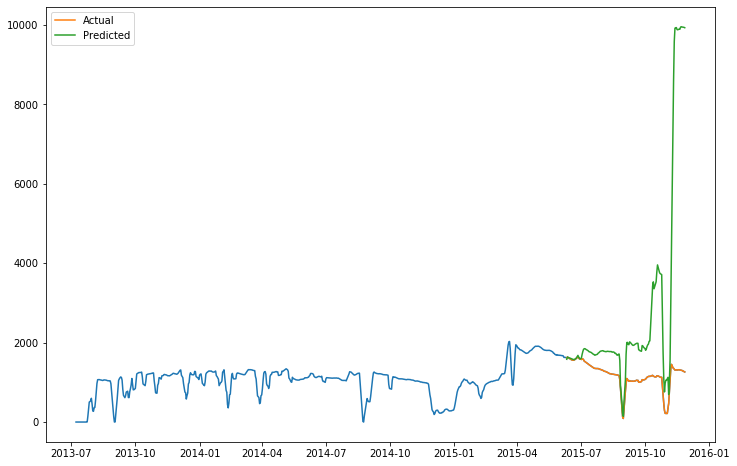

In [103]:
plt.figure(figsize=(12,8))
plt.plot(df_train.index,train_labels)
plt.plot(df_test.index,test_labels,label= 'Actual')
plt.plot(df_test.index,test_predictions,label = 'Predicted')
plt.legend()